In [2]:
%matplotlib inline
import sys


import numpy as np


import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


import datetime
import time

sns.set()
pal = sns.hls_palette(10, h=.5)
sns.set_palette(pal)

#Avoid display of scientific notation and show precision of 4 decimals:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
df_viz = pd.read_csv('filtered_data.csv')

In [4]:
import matplotlib.mlab as mlab

In [5]:
from matplotlib.ticker import FuncFormatter #Call formatter function to format tick values
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox) #Create image box
from matplotlib._png import read_png #Load png file
from matplotlib.patches import Ellipse #Draw ellipse

In [6]:
def thousands_comma(x, pos):
    """
    Args are the value and tick position. 
    Returns number with thousands comma and no decimals.
    """
    return '{:,.0f}'.format(x)

In [7]:
def thousands_format(x, pos):
    """
    Args are the value and tick position. 
    Returns number of thousands with one decimal, and K in lieu of 3 zeros.
    """
    return '{:.0f}{}'.format(x * 1e-3, 'K') 

In [7]:
def millions_format(x, pos):
    """
    Args are the value and tick position. 
    Returns number of millions with one decimal, and M in lieu of 6 zeros.
    """
    return '{:.1f}{}'.format(x * 1e-6, 'M')

In [8]:
def millions_currency(x, pos):
    """
    Args are the value and tick position. 
    Returns number of millions with a $ sign, M in lieu of 6 zeros, and no decimals.
    """
    return '{}{:.0f}{}'.format('$', x * 1e-6, 'M')

In [8]:
def annotate_labels(ax, labels_list, **kwargs):
    """
    Function to automatically add labels on bar charts.
    It takes a plot axis, an ordered list of labels, and text kwargs.
    """
    
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    rects = ax.patches

    for rect, label in zip(rects, labels_list):
        height = rect.get_height()
        p_height = (height / y_height) # Fraction of axis height taken up by this rectangle
        label_position = height + (y_height * 0.01)
        ax.text(rect.get_x() + rect.get_width()/2., label_position, label, kwargs)
    return None

In [9]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_labels = [ 'Jan']

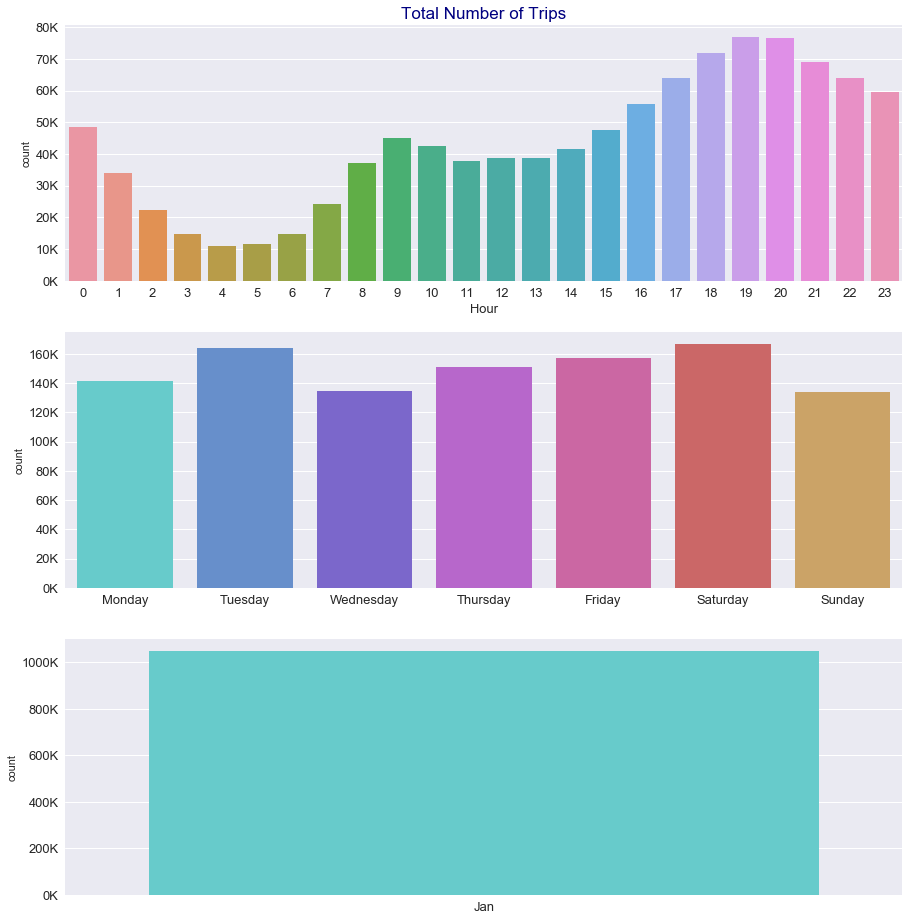

In [45]:
fig = plt.figure(figsize = (15,16))
formatter = FuncFormatter(thousands_format)

plt.subplot(3,1,1) #this plot could have a polar format, although I'm not sure it'd be a better viz.
ax1 = sns.countplot(df_viz.hour, order = range(24))
ax1.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.title('Total Number of Trips', fontsize=17, color='navy')
plt.xlabel('Hour', fontsize=13)

plt.subplot(3,1,2)
ax2 = sns.countplot(df_viz.weekday, order = range(7))
ax2.set_xticklabels(weekday_labels)
ax2.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.xlabel('')

plt.subplot(3,1,3) #same as the line plot but with less granularity, perhaps easier to visualize the MOM growth
ax3 = sns.countplot(df_viz.month)
ax3.set_xticklabels(month_labels)
ax3.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.xlabel('')

#fig.subplots_adjust(hspace=.5)
plt.show()

In [10]:
df_plt2 = df_viz.groupby('weekday')['trip_mph_avg'].median()

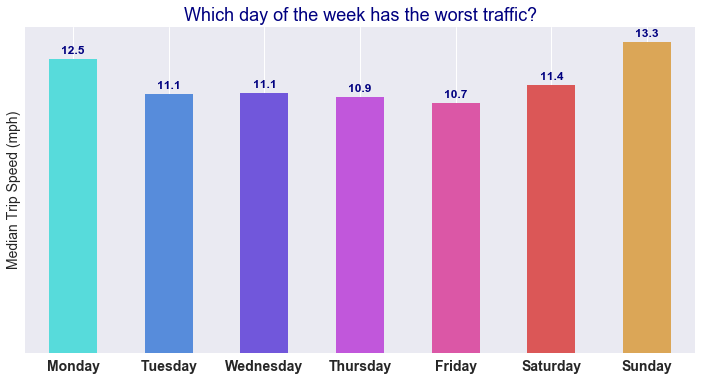

In [34]:
fig = plt.figure()
labels_list = df_plt2.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt2.plot(kind='bar', rot = 0, figsize = (12, 6), fontsize = 12, linewidth=1)
ax.set_xticklabels(weekday_labels, weight='bold')
#ax.set_axis_bgcolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.xlabel('')
plt.ylabel('Median Trip Speed (mph)', fontsize = 14)
plt.tick_params(labelsize=14)
plt.title('Which day of the week has the worst traffic?', fontsize = 18, color='navy')
plt.show()

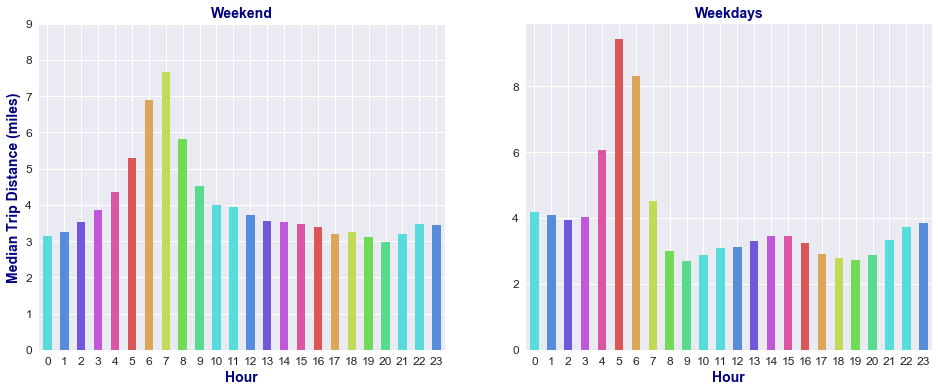

In [16]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
df_viz[(df_viz.weekday >= 5)].groupby('hour')['trip_distance'].median().plot(kind='bar', rot = 0, fontsize=14)
plt.ylim(0, 9)
plt.tick_params(labelsize=12)
plt.ylabel('Median Trip Distance (miles)', fontsize=14, weight='bold', color='navy')
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekend', fontsize=14, weight='bold', color='navy')

plt.subplot(1,2,2)
df_viz[df_viz.weekday < 5].groupby('hour')['trip_distance'].median().plot(kind='bar', rot = 0)
plt.tick_params(labelsize=12)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekdays', fontsize=14, weight='bold', color='navy')

plt.show()

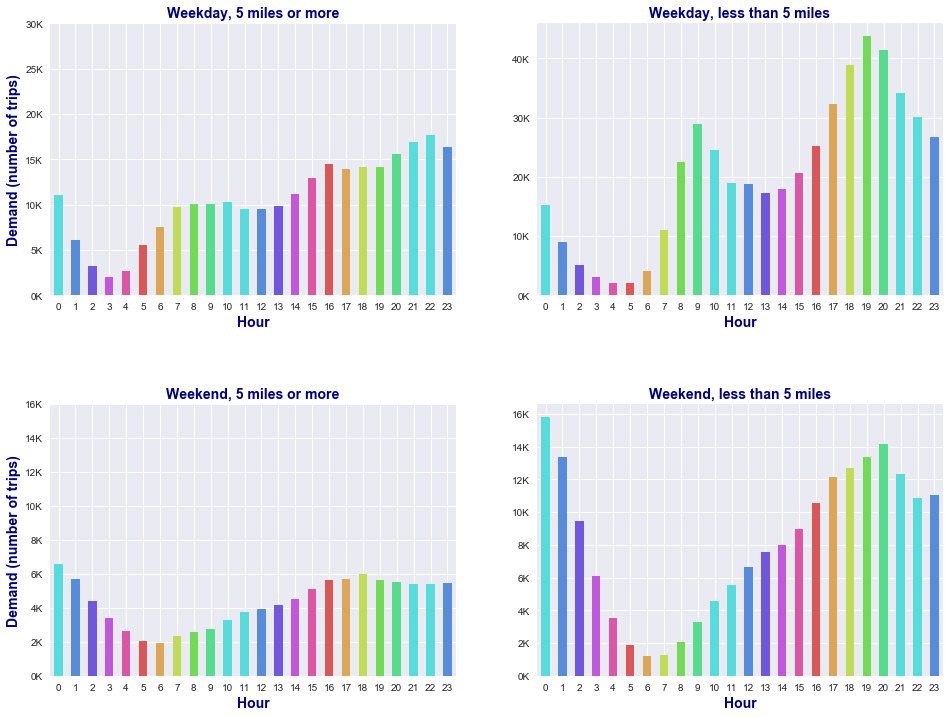

In [42]:
fig = plt.figure(figsize = (16,12))
formatter = FuncFormatter(thousands_format)


plt.subplot(2,2,1)
ax1 = df_viz[(df_viz.weekday < 5) & (df_viz.trip_distance >= 5)].\
groupby('hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax1.yaxis.set_major_formatter(formatter)
#ellipse = Ellipse(xy=(5, 150000), width=4, height=200000, edgecolor='red', fc='None', lw=1.5)
#ax1.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
plt.ylim(0, 30000)
plt.title('Weekday, 5 miles or more', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,2)
ax2 = df_viz[(df_viz.weekday < 5) & (df_viz.trip_distance < 5)].\
groupby('hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax2.yaxis.set_major_formatter(formatter)
#ellipse = Ellipse(xy=(5, 150000), width=4, height=200000, edgecolor='red', fc='None', lw=1.5)
#ax2.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekday, less than 5 miles', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,3)
ax3 = df_viz[(df_viz.weekday >= 5) & (df_viz.trip_distance >= 5)].\
groupby('hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax3.yaxis.set_major_formatter(formatter)
#ellipse = Ellipse(xy=(6.5, 50000), width=4, height=80000, edgecolor='red', fc='None', lw=1.5)
#ax3.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
plt.ylim(0, 16000)
plt.title('Weekend, 5 miles or more', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,4)
ax4 = df_viz[(df_viz.weekday >= 5) & (df_viz.trip_distance < 5)].\
groupby('hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax4.yaxis.set_major_formatter(formatter)
#ellipse = Ellipse(xy=(6.5, 50000), width=4, height=80000, edgecolor='red', fc='None', lw=1.5)
#ax4.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekend, less than 5 miles', fontsize=14, weight='bold', color='navy')


fig.subplots_adjust(hspace=0.4)
plt.show()

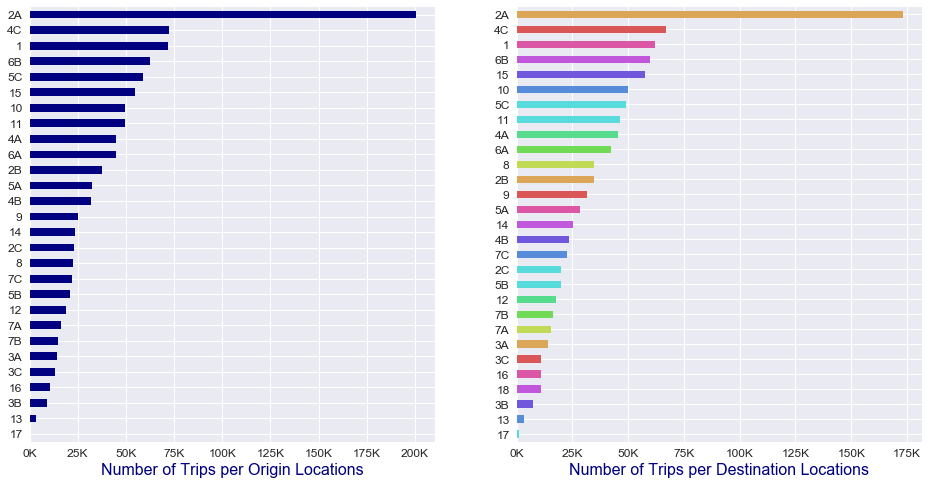

In [49]:
fig = plt.figure(figsize = (16,8))
formatter = FuncFormatter(thousands_format)

plt.subplot(1,2,1)
ax1 = df_viz.origin_taz.value_counts(ascending = True).plot(kind = 'barh', color = 'navy')
#ax1.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Origin Locations', fontsize = 16, color='navy')
ax1.xaxis.set_major_formatter(formatter)

plt.subplot(1,2,2) #note: it won't account missing values (4% of data)
ax2 = df_viz.destination_taz.value_counts(ascending = True).plot(kind = 'barh')
#ax2.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
ax2.xaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Destination Locations', fontsize = 16, color='navy')

plt.show()

In [9]:
df_plt3 = df_viz.pivot_table('id', aggfunc='count', index='origin_taz', columns='destination_taz')

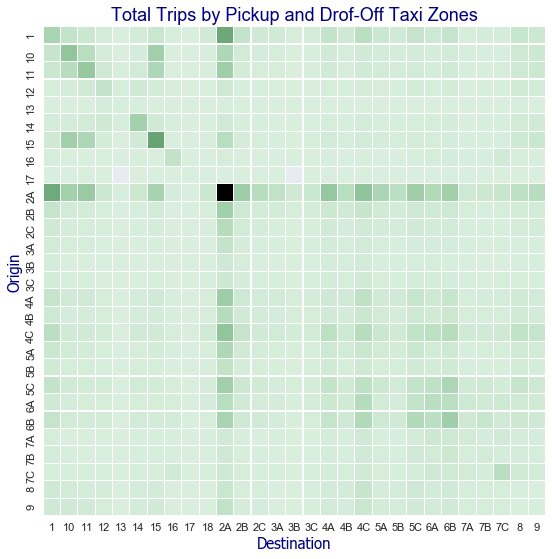

In [20]:
fig = plt.figure(figsize=(9,9))

cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.9, as_cmap=True) #'YlOrRd' #ggplot:'viridis'

sns.heatmap(df_plt3, cmap=cmap, linewidths=0.1, cbar=False)

plt.title('Total Trips by Pickup and Drof-Off Taxi Zones', fontsize=18, color='navy')
plt.xlabel('Destination', fontsize=15, fontname='Tahoma', color='navy')
plt.ylabel('Origin', fontsize=15, fontname='Tahoma', color='navy')
plt.tick_params(labelsize=11)
plt.show()


In [11]:
df_plt4 = df_viz[df_viz.origin_taz == '2A'].groupby('destination_taz')['trip_distance'].mean().sort_values()

In [12]:
df_plt5 = df_viz[df_viz.origin_taz == '2A'].groupby('destination_taz')['duration_min'].mean().sort_values()

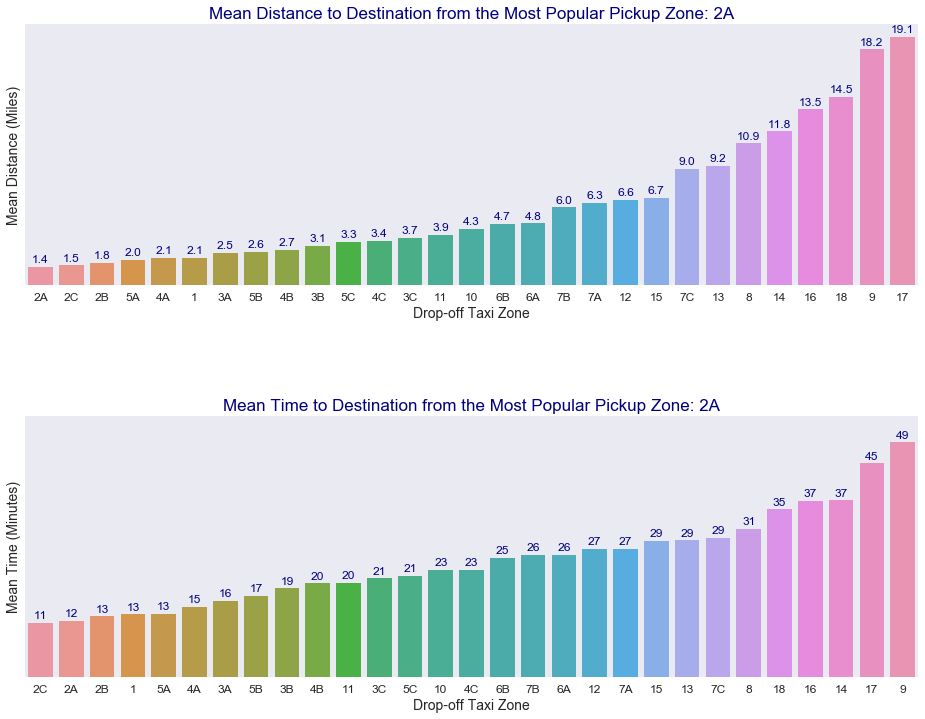

In [25]:
fig = plt.figure(figsize = (16,12))
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'color': 'navy'}


plt.subplot(2,1,1)
ax1 = sns.barplot(x=df_plt4.index, y=df_plt4.values)
#ax1.set_axis_bgcolor('#F9F9F9')
#ax1.set_yticks(range(0, 21, 2))
ax1.get_yaxis().set_ticks([])
labels_list = df_plt4.values.round(1)
annotate_labels(ax1, labels_list, **kwargs)
plt.title('Mean Distance to Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
plt.ylabel('Mean Distance (Miles)', fontsize = 14)
plt.xlabel('Drop-off Taxi Zone', fontsize=14)
plt.tick_params(labelsize=12)


plt.subplot(2,1,2)
ax2 = sns.barplot(x=df_plt5.index, y=df_plt5.values)
#ax2.set_axis_bgcolor('#F9F9F9')
#ax2.set_yticks(range(0, 51, 5))
ax2.get_yaxis().set_ticks([])
labels_list = df_plt5.apply(lambda x: '{:.0f}'.format(round(x))).values
annotate_labels(ax2, labels_list, **kwargs)
plt.title('Mean Time to Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
plt.ylabel('Mean Time (Minutes)', fontsize = 14)
plt.ylim(0,55)
plt.xlabel('Drop-off Taxi Zone', fontsize=14)
plt.tick_params(labelsize=12)


fig.subplots_adjust(hspace=.5)
plt.show()
#plot_url = py.plot_mpl(fig)


In [13]:
df_plt7 = df_viz[df_viz.weekday < 5].groupby('hour')['trip_mph_avg'].median()
df_plt7.head()

hour
0   15.1508
1   15.9831
2   16.7645
3   17.3165
4   20.9121
Name: trip_mph_avg, dtype: float64

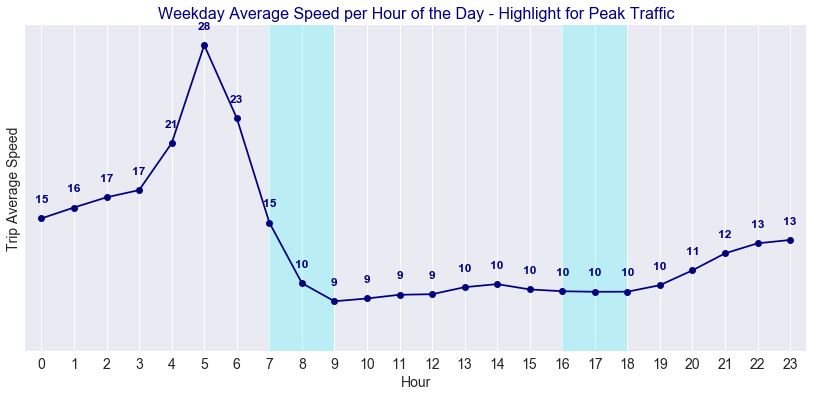

In [28]:
plt.figure(figsize =(14, 6))
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'top', 'color': 'navy', 'weight': 'bold'}

#weekdays only: rush hour traffic 7-9 + 16-18
ax = df_plt7.plot(marker = 'o', color = 'navy')

for x, y in zip(df_plt7.index, df_plt7.values):
    ax.annotate('{:.0f}'.format(y), xy=(x, y), xytext= (0, 24), textcoords='offset points', **kwargs)

#ax.set_axis_bgcolor('#F9F9F9')
ax.get_yaxis().set_ticks([]) #hide tick labels on y-axis
plt.fill([7,9,9,7], [0,0,30,30], 'cyan', alpha=0.2)
plt.fill([16,18,18,16], [0,0,30,30], 'cyan', alpha=0.2)
plt.xticks(range(24))
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Trip Average Speed', fontsize=14)
plt.ylim(5, 30)
plt.xlim(-0.5, 23.5)
plt.tick_params(labelsize=14)
plt.title('Weekday Average Speed per Hour of the Day - Highlight for Peak Traffic', fontsize = 16, color='navy')
plt.show()

In [14]:
def is_peak_hour(x):
    """ 
    Function that takes an array(x) with two integers representing 
    hour of the day and weekday, respectively, and
    returns 1 if it's peak hour as defined, 0 otherwise.
    """
    return 1 if x[0] in (7,8,9,16,17,18) and x[1] < 5 else 0 

In [15]:
df_viz['peak_hour'] = pd.Series(map(lambda x: is_peak_hour(x), df_viz.loc[:, ['hour', 'weekday']].values))

In [31]:
df_viz.head()

,id,origin_taz,destination_taz,trip_distance,pu_date,day,month,year,hour,weekday,duration_min,trip_mph_avg,peak_hour
0,252581,7C,6A,4.2500,2014-09-01,1,9,2014,9,0,15.1833,16.7947,1
1,252582,7B,15,10.1700,2014-09-01,1,9,2014,18,0,34.0833,17.9032,1
2,252583,11,2A,4.0200,2014-09-01,1,9,2014,17,0,17.1000,14.1053,1
3,252584,3B,4A,1.4600,2014-09-01,1,9,2014,13,0,6.5333,13.4082,0
4,252585,2A,10,8.3100,2014-09-01,1,9,2014,14,0,26.2833,18.9702,0


C:\Users\Harshi\Anaconda3\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


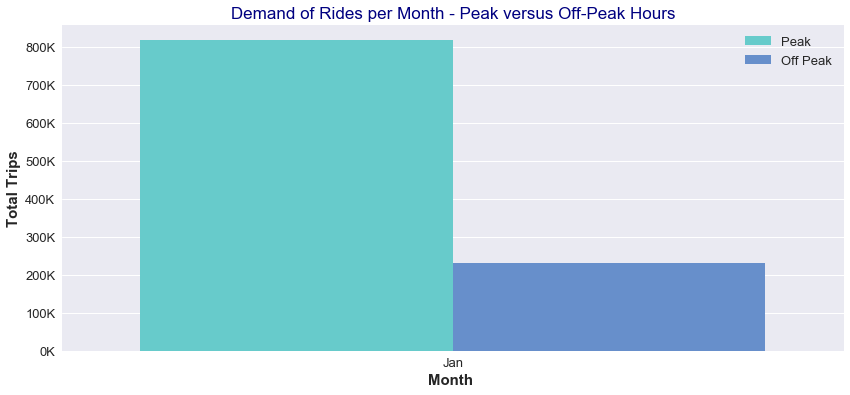

In [47]:
plt.figure(figsize = (14, 6))
formatter = FuncFormatter(thousands_format)

#to add labels and operate on data, use pivot instead of countplot directly with hue.
ax = sns.countplot(df_viz['month'], hue = df_viz['peak_hour'])
ax.set_xticklabels(month_labels)
ax.yaxis.set_major_formatter(formatter)

handles, labels = ax.get_legend_handles_labels() #will cause the warning msg that can be ignored 
plt.legend(handles, labels=['Peak', 'Off Peak'], loc='best', fontsize=13)
plt.tick_params(labelsize=13)
plt.xlabel('Month ', fontsize = 15, weight='bold')
plt.ylabel('Total Trips', fontsize = 15, weight='bold')
plt.title('Demand of Rides per Month - Peak versus Off-Peak Hours', fontsize = 17, color='navy')
plt.show()

In [16]:
data = df_viz[(df_viz.weekday >= 5)].groupby('hour')['trip_distance'].median()

In [17]:
data1 = df_viz[df_viz.weekday < 5].groupby('hour')['trip_distance'].median()


In [18]:
ax1 = df_viz[(df_viz.weekday < 5) & (df_viz.trip_distance >= 5)].\
groupby('hour')['trip_distance'].count()

In [19]:
ax2 = df_viz[(df_viz.weekday < 5) & (df_viz.trip_distance < 5)].\
groupby('hour')['trip_distance'].count()

In [20]:
ax3 = df_viz[(df_viz.weekday >= 5) & (df_viz.trip_distance >= 5)].\
groupby('hour')['trip_distance'].count()

In [21]:
ax4 = df_viz[(df_viz.weekday >= 5) & (df_viz.trip_distance < 5)].\
groupby('hour')['trip_distance'].count()

In [22]:
ax5 = df_viz.origin_taz.value_counts(ascending = True)

In [23]:
ax6 = df_viz.destination_taz.value_counts(ascending = True)

In [24]:
ax7= df_viz.pivot_table('id', aggfunc='count', index='origin_taz', columns='destination_taz')

IndentationError: unexpected indent (<ipython-input-23-a14ba13db0c8>, line 3)

In [44]:
import matplotlib
matplotlib.use("TkAgg")
#import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import tkinter as tk
from tkinter import ttk
from tkinter import *
from PIL import Image, ImageTk


LARGE_FONT= ("Verdana", 12)


class uber(tk.Tk):
    
    
    '''def __init__(self, master, *pargs):
        tk.Tk.__init__(self, master, *pargs)



        self.image = Image.open("uber.jpg")
        
        self.img_copy= self.image.copy()


        self.background_image = ImageTk.PhotoImage(self.image)

        self.background = Label(self, image=self.background_image)
        self.background.pack(fill=BOTH, expand=YES)
        self.background.bind('<Configure>', self._resize_image)
        
        def _resize_image(self,event):

        new_width = event.width
        new_height = event.height

        self.image = self.img_copy.resize((new_width, new_height))

        self.background_image = ImageTk.PhotoImage(self.image)
        self.background.configure(image =  self.background_image)'''

        


    def __init__(self, *args, **kwargs):
        
        tk.Tk.__init__(self, *args, **kwargs)

        
        tk.Tk.wm_title(self, "Uber Analysis Report ")
        #root = Tk()
        #bg = PhotoImage(file="uber.jpg")
        
        #label = Label(self,image=bg)
        #label.pack(x=0,y=0)
        '''self.image = Image.open("uber.jpg")
        
       


        self.background_image = ImageTk.PhotoImage(self.image)

        self.background = Label(self, image=self.background_image)
        self.background.pack(fill=BOTH, expand=YES)'''
        
        
   
        container = tk.Frame(self)
        container.pack(side="top", fill="both", expand = True)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {}

        for F in (StartPage, PageOne, PageTwo, PageThree,PageFour,PageFour1,PageFive,PageFive1,PageSix,PageSix1,PageSeven,PageEight,PageTen,Page11,Page12,Page13,Page14):

            frame = F(container, self)

            self.frames[F] = frame

            frame.grid(row=0, column=0, sticky="nsew")

        self.show_frame(StartPage)

    def show_frame(self, cont):

        frame = self.frames[cont]
        frame.tkraise()

        
class StartPage(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self,parent)
        label = tk.Label(self, text="Home", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button = ttk.Button(self,text="Total Number of Trips on basis of hours  ",
                            command=lambda: controller.show_frame(PageOne))
        button.pack(pady=5)

        button2 = ttk.Button(self, text="Total Number of Trips in a week ",
                            command=lambda: controller.show_frame(PageTwo))
        button2.pack(pady=5)

        button3 = ttk.Button(self, text="Total Number of Trips in a month",
                            command=lambda: controller.show_frame(PageThree))
        button3.pack(pady=5)

        button4 = ttk.Button(self, text="Median Trip Distance - weekend & weekdays ",
                            command=lambda: controller.show_frame(PageFour))
        button4.pack(pady=5)
        
        button5 = ttk.Button(self, text=" Demand Of Trips on weekdays ",
                            command=lambda: controller.show_frame(PageFive))
        button5.pack(pady=5)
        button6 = ttk.Button(self, text=" Demand Of Trips on weekend",
                            command=lambda: controller.show_frame(PageSix))
        button6.pack(pady=5)
        button7 = ttk.Button(self, text=" Popular Pickup Zones",
                            command=lambda: controller.show_frame(PageSeven ))
        button7.pack(pady=5)
        button8 = ttk.Button(self, text=" Popular Dropoff Zones",
                            command=lambda: controller.show_frame(PageEight ))
        button8.pack(pady=5)
        #button9 = ttk.Button(self, text=" Page9",command=lambda: controller.show_frame(PageNine ))
        #button9.pack()
        button10 = ttk.Button(self, text=" Mean Distance to reach Destination from the Most Popular Pickup Zone",
                            command=lambda: controller.show_frame(PageTen ))
        button10.pack(pady=5)
        button11 = ttk.Button(self, text=" Mean Time to reach Destination from the Most Popular Pickup Zone",
                            command=lambda: controller.show_frame(Page11 ))
        button11.pack(pady=5)
        button12 = ttk.Button(self, text=" Highlight for Peak Traffic",
                            command=lambda: controller.show_frame(Page12 ))
        button12.pack(pady=5)
        button13 = ttk.Button(self, text=" Demand of Rides per Month - Peak versus Off-Peak Hours",
                            command=lambda: controller.show_frame(Page13 ))
        button13.pack(pady=5)
        button14 = ttk.Button(self, text=" Which day of the week has the worst traffic?",
                            command=lambda: controller.show_frame(Page14 ))
        button14.pack(pady=5)
        

class PageOne(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Total Number of Trips on basis of hours", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",
                            command=lambda: controller.show_frame(StartPage))
        button1.pack()

        #button2 = ttk.Button(self, text="Page Two",
                            #command=lambda: controller.show_frame(PageTwo))
        #button2.pack()
        formatter = FuncFormatter(thousands_format)
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        #fig = plt.figure(figsize = (15,16))
        #plt.subplot(1,1,1)
        
        
        sns.countplot(df_viz.hour,ax = a,order = range(24))
        a.yaxis.set_major_formatter(formatter)
        
        #plt.tick_params(labelsize=13)
        a.set_title('Total Number of Trips on basis of hours', fontsize=17, color='navy')
        a.set_xlabel('Hour', fontsize=13)
        
        #a.show()
        #a.plot([1,2,3,4,5,6,7,8],[5,6,1,3,8,9,3,5])

        

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)


class PageTwo(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Total Number of Trips in a week", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",command=lambda: controller.show_frame(StartPage))
        button1.pack()

        '''button2 = ttk.Button(self, text="Page One",
                            command=lambda: controller.show_frame(PageOne))
        button2.pack()'''
        formatter = FuncFormatter(thousands_format)
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        #fig = plt.figure(figsize = (15,16))
        #plt.subplot(1,1,1)
        
        
        sns.countplot(df_viz.weekday, order = range(7),ax = a)
        a.yaxis.set_major_formatter(formatter)
        
        #plt.tick_params(labelsize=13)
        a.set_title('Total Number of Trips in a week ', fontsize=17, color='navy')
        a.set_xlabel('')
        a.set_xticklabels(weekday_labels)
        #a.show()
        #a.plot([1,2,3,4,5,6,7,8],[5,6,1,3,8,9,3,5])

        

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)



class PageThree(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Total Number of Trips in a month", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",command=lambda: controller.show_frame(StartPage))
        #button1.grid(row=0, column=1, padx=10, pady=10)
        #button1.place(x=1,y=5)
        button1.pack(padx=25)

    
       
        formatter = FuncFormatter(thousands_format)
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        
        
        
        sns.countplot(df_viz.month, ax = a)
        a.yaxis.set_major_formatter(formatter)
        
        #plt.tick_params(labelsize=13)
        a.set_title('Total Number of Trips in a month ', fontsize=17, color='navy')
        a.set_xticklabels(month_labels)
        a.set_xlabel('')
        

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
                
class PageFour(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text=" Median Trip Distance - weekend ", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",command=lambda: controller.show_frame(StartPage))
        button1.pack(padx=25)
        button2 = ttk.Button(self, text="Median Trip Distance - weekdays",command=lambda: controller.show_frame(PageFour1))
        button2.pack()
    
       
        formatter = FuncFormatter(thousands_format)
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        
        #data = df_viz[(df_viz.weekday >= 5)].groupby('hour')['trip_distance'].median()
        #sns.distplot(data,ax = a)
        data.plot(kind='bar', rot = 0, fontsize=14,ax = a)
        #a.bar(data, height =0.2 ,width=0.4)
        #a.fig.add_axes([0])
        a.set_title('Weekend', fontsize=14, weight='bold', color='navy')
        a.set_ylim(0, 9)
        a.set_xlabel('Hour', fontsize=14, weight='bold', color='navy')
        a.set_ylabel('Median Trip Distance (miles)', fontsize=14, weight='bold', color='navy')
                      
        
       

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        
class PageFour1(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text=" Median Trip Distance -  weekdays ", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",command=lambda: controller.show_frame(StartPage))
        button1.pack(padx=25)
        button2 = ttk.Button(self, text="Median Trip Distance - weekend ",command=lambda: controller.show_frame(PageFour))
        button2.pack()
    
       
        formatter = FuncFormatter(thousands_format)
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        
        #data = df_viz[(df_viz.weekday >= 5)].groupby('hour')['trip_distance'].median()
        #sns.distplot(data,ax = a)
        data1.plot(kind='bar', rot = 0, fontsize=14,ax = a)
        #a.bar(data, height =0.2 ,width=0.4)
        #a.fig.add_axes([0])
        a.set_title('Weekdays', fontsize=14, weight='bold', color='navy')
        a.set_ylim(0, 9)
        a.set_xlabel('Hour', fontsize=14, weight='bold', color='navy')
        a.set_ylabel('Median Trip Distance (miles)', fontsize=14, weight='bold', color='navy')
       

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        
class PageFive(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text=" Demand Of Trips on weekdays", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",command=lambda: controller.show_frame(StartPage))
        button1.pack(padx=25)
        button2 = ttk.Button(self, text="Demand Of Trips on weekdays- less than 5 miles",command=lambda: controller.show_frame(PageFive1))
        button2.pack()
    
       
        formatter = FuncFormatter(thousands_format)
        
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        
        #ax1
        
        ax1.plot(kind='bar', rot = 0, fontsize=14,ax=a )
        a.yaxis.set_major_formatter(formatter)
        a.set_title('Weekday, 5 miles or more', fontsize=14, weight='bold', color='navy')
        a.set_ylim(0,30000 )
        a.set_xlabel('Hour', fontsize=14, weight='bold', color='navy')
        a.set_ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
                      
        
       

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
                      
class PageFive1(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text=" Demand Of Trips on weekdays", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",command=lambda: controller.show_frame(StartPage))
        button1.pack(padx=25)
        button2 = ttk.Button(self, text="Demand Of Trips on weekdays - more  than 5 miles",command=lambda: controller.show_frame(PageFive))
        button2.pack()
    
       
        formatter = FuncFormatter(thousands_format)
        
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        
       
        #ax2
        a = f.add_subplot(111)
        ax2.plot(kind='bar', rot = 0, fontsize=14,ax=a )
        a.yaxis.set_major_formatter(formatter)
        a.set_title('Weekday, less than 5 miles', fontsize=14, weight='bold', color='navy')
    
        a.set_xlabel('Hour', fontsize=14, weight='bold', color='navy')
        a.set_ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
       

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        
class PageSix(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text=" Demand Of Trips on weekend ", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",command=lambda: controller.show_frame(StartPage))
        button1.pack(padx=25)

    
        button2 = ttk.Button(self, text="Demand Of Trips on weekend- less than 5 miles",command=lambda: controller.show_frame(PageSix1))
        button2.pack()
        formatter = FuncFormatter(thousands_format)
        
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        
        #ax3
        
        ax3.plot(ax=a, rot = 0, fontsize=14,kind='bar' )
        a.yaxis.set_major_formatter(formatter)
        a.set_title('Weekend, 5 miles or more', fontsize=14, weight='bold', color='navy')
        a.set_ylim(0, 16000)
        a.set_xlabel('Hour', fontsize=14, weight='bold', color='navy')
        a.set_ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
                      
        
       

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        
class PageSix1(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text=" Demand Of Trips on weekend ", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",command=lambda: controller.show_frame(StartPage))
        button1.pack(padx=25)
        button2 = ttk.Button(self, text="Demand Of Trips on weekend- more  than 5 miles",command=lambda: controller.show_frame(PageSix))
        button2.pack()
    
       
        formatter = FuncFormatter(thousands_format)
        
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        
                      
        #ax4
       
        ax4.plot(ax=a, rot = 0, fontsize=14,kind='bar' )
        a.yaxis.set_major_formatter(formatter)
        a.set_title('Weekend, less than 5 miles', fontsize=14, weight='bold', color='navy')
        a.set_xlabel('Hour', fontsize=14, weight='bold', color='navy')
        a.set_ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
       

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
                      
class PageSeven(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text=" Popular Pickup Zones", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",command=lambda: controller.show_frame(StartPage))
        button1.pack(padx=25)

    
       
        formatter = FuncFormatter(thousands_format)
        
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        
        #ax5
        
        ax5.plot(ax=a, color = 'navy',kind = 'barh' )
        
        a.set_xlabel('Number of Trips per Origin Locations', fontsize = 16, color='navy')
        
        
        a.xaxis.set_major_formatter(formatter)




        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

class PageEight(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text=" Popular Dropoff Zones", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",command=lambda: controller.show_frame(StartPage))
        button1.pack(padx=25)

    
       
        formatter = FuncFormatter(thousands_format)
        
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        
       
        #ax6
        
        ax6.plot(ax=a, color = 'navy',kind = 'barh' )
        a.xaxis.set_major_formatter(formatter)
        a.set_xlabel('Number of Trips per Destination Locations', fontsize = 16, color='navy')
       

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
                      
'''class PageNine(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Page Two!!!", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",command=lambda: controller.show_frame(StartPage))
        button1.pack()

        formatter = FuncFormatter(thousands_format)
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        #fig = plt.figure(figsize = (15,16))
        #plt.subplot(1,1,1)
        
        cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.9, as_cmap=True)
        sns.heatmap(ax7, cmap=cmap, linewidths=0.1, cbar=False,ax = a)
        
        a.set_title('Total Trips by Pickup and Drof-Off Taxi Zones', fontsize=18, color='navy')
        a.set_xlabel('Destination', fontsize=15, fontname='Tahoma', color='navy')
        a.set_ylabel('Origin', fontsize=15, fontname='Tahoma', color='navy')


        

        canvas = FigureCanvasTkAgg(f, self)
        canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2TkAgg(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)'''
        
class PageTen(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Mean Distance to reach Destination from the Most Popular Pickup Zone", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",command=lambda: controller.show_frame(StartPage))
        button1.pack()

        
        
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
      
        kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'color': 'navy'}


        
        sns.barplot(x=df_plt4.index, y=df_plt4.values,ax=a)
       
        a.get_yaxis().set_ticks([])
        labels_list = df_plt4.values.round(1)
        annotate_labels(a, labels_list, **kwargs)
        a.set_title('Mean Distance to reach Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
        a.set_ylabel('Mean Distance (Miles)', fontsize = 14)
        a.set_xlabel('Drop-off Taxi Zone', fontsize=14)
       

        

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        
        
class Page11(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Mean Time to reach Destination from the Most Popular Pickup Zone", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",
                            command=lambda: controller.show_frame(StartPage))
        button1.pack()

        
        
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
      
        kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'color': 'navy'}


        
        sns.barplot(x=df_plt4.index, y=df_plt4.values,ax=a)
       
        a.get_yaxis().set_ticks([])
        labels_list = df_plt5.apply(lambda x: '{:.0f}'.format(round(x))).values
        annotate_labels(a, labels_list, **kwargs)
        a.set_title('Mean Time to reach Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
        a.set_ylabel('Mean Time (Minutes)', fontsize = 14)
        a.set_xlabel('Drop-off Taxi Zone', fontsize=14)
        sns.barplot(x=df_plt5.index, y=df_plt5.values,ax=a)
        a.set_ylim(0,55)

        

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        
class Page12(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Highlight for Peak Traffic", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",
                            command=lambda: controller.show_frame(StartPage))
        button1.pack()

        
        
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
      
        kwargs = {'fontsize': 12, 'ha':'center', 'va': 'top', 'color': 'navy', 'weight': 'bold'}
        for x, y in zip(df_plt7.index, df_plt7.values):
            a.annotate('{:.0f}'.format(y), xy=(x, y), xytext= (0, 24), textcoords='offset points', **kwargs)

        a.plot(df_plt7,marker = 'o', color = 'navy')
        a.get_yaxis().set_ticks([])
        a.fill([7,9,9,7], [0,0,30,30], 'cyan', alpha=0.2)
        a.fill([16,18,18,16], [0,0,30,30], 'cyan', alpha=0.2)
        a.set_xticks(range(24))

        a.set_title('Weekday Average Speed per Hour of the Day - Highlight for Peak Traffic', fontsize = 16, color='navy')
        a.set_ylabel('Trip Average Speed', fontsize=14)
        a.set_xlabel('Hour', fontsize=14)
        
        a.set_ylim(5, 30)
        a.set_xlim(-0.5, 23.5)
        

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
                
class Page13(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Demand of Rides per Month - Peak versus Off-Peak Hours", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",
                            command=lambda: controller.show_frame(StartPage))
        button1.pack()

        
        formatter = FuncFormatter(thousands_format)
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
       
        
        
        sns.countplot(df_viz['month'], hue = df_viz['peak_hour'],ax = a)
        a.yaxis.set_major_formatter(formatter)
        
        
        a.set_title('Demand of Rides per Month - Peak versus Off-Peak Hours', fontsize = 17, color='navy')
        a.set_xlabel('Month ', fontsize = 15, weight='bold')
        a.set_ylabel('Total Trips', fontsize = 15, weight='bold')
        a.set_xticklabels(month_labels)
        handles, labels = a.get_legend_handles_labels() #will cause the warning msg that can be ignored 
        a.legend(handles, labels=['Peak', 'Off Peak'], loc='best', fontsize=13)
        
       

        

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)
        
        
class Page14(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Page 14!!!", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",
                            command=lambda: controller.show_frame(StartPage))
        button1.pack()

        
        formatter = FuncFormatter(thousands_format)
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
       
        
        labels_list = df_plt2.values.round(1)
        kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

       
        
        df_plt2.plot(kind='bar', rot = 0, fontsize = 12, linewidth=1,ax=a )
        a.set_xticklabels(weekday_labels, weight='bold')

        a.get_yaxis().set_ticks([])
        annotate_labels(a, labels_list, **kwargs)
        a.set_title('Which day of the week has the worst traffic?', fontsize = 18, color='navy')
        a.set_xlabel('Month ', fontsize = 15, weight='bold')
        a.set_ylabel('Median Trip Speed (mph)', fontsize = 14)
        
        

        canvas = FigureCanvasTkAgg(f, self)
        #canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)







app = uber()
app.mainloop()
        

C:\Users\Harshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Harshi\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Harshi\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Harshi\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Harshi\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Harshi\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\H

C:\Users\Harshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:448: MatplotlibDeprecationWarning: The FigureCanvasTk.show function was deprecated in version 2.2. Use FigureCanvasTk.draw instead.
C:\Users\Harshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:451: MatplotlibDeprecationWarning: The NavigationToolbar2TkAgg class was deprecated in version 2.2.
C:\Users\Harshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:483: MatplotlibDeprecationWarning: The FigureCanvasTk.show function was deprecated in version 2.2. Use FigureCanvasTk.draw instead.
C:\Users\Harshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:486: MatplotlibDeprecationWarning: The NavigationToolbar2TkAgg class was deprecated in version 2.2.
C:\Users\Harshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:519: MatplotlibDeprecationWarning: The FigureCanvasTk.show function was deprecated in version 2.2. Use FigureCanvasTk.draw instead.
C:\Users\Harshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:522: Mat